<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/dacon_movie/movie_audience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DACON 영화 관객수 예측 경진대회

사이트: https://dacon.io/competitions/open/235536/overview/description

# 목차
### 0. 데이터 로드
### 1. 데이터 EDA, visualization
### 2. 데이터 전처리
### 3. 모델 생성 및 학습
### 4. 결론

* 참고

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 0.데이터로드

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!cp /gdrive/MyDrive/Dacon_study/movie/movies_test.csv ./
!cp /gdrive/MyDrive/Dacon_study/movie/movies_train.csv ./
!cp /gdrive/MyDrive/Dacon_study/movie/submission.csv ./

In [ ]:
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


* title: 영화 제목
* distributor: 배급사
* genre : 장르
* release_time: 개봉일
* time: 상영시간(분)
* screening_rat : 상영등급
* director: 감독이름
* dir_prev_bfnum : 해당감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dif_prev_num : 해당감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단, 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor: 주연배우수
* box_off_num: 관객수

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
print(train.shape)
print(test.shape)

(600, 12)
(243, 11)


# 1.데이터 EDA, visualization

In [ ]:
train.describe()

,time,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,5.000000,869.000000,25.000000,1.426277e+07


## Data Cleansing

In [ ]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

dir_prev_bfnum(영화 만들기 전 감독 평균 관객수)의 null값이 train, test데이터의 절반이상 차지

In [ ]:
# null값 많은 dir_prev_bfnum 삭제
train = train.drop('dir_prev_bfnum',axis=1)
test = test.drop('dir_prev_bfnum',axis=1)

In [ ]:
# release_time 데이터 타입 datetime으로 변경
train['release_time'] = pd.to_datetime(train['release_time'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          600 non-null    object        
 1   distributor    600 non-null    object        
 2   genre          600 non-null    object        
 3   release_time   600 non-null    datetime64[ns]
 4   time           600 non-null    int64         
 5   screening_rat  600 non-null    object        
 6   director       600 non-null    object        
 7   dir_prev_num   600 non-null    int64         
 8   num_staff      600 non-null    int64         
 9   num_actor      600 non-null    int64         
 10  box_off_num    600 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 51.7+ KB


In [ ]:
# 년도, 월 추출
train['release_year'], train['release_month'] = (train['release_time'].dt.year, train['release_time'].dt.month)
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2,20,6,217866,2012,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,251,2,483387,2010,11


## 시각화

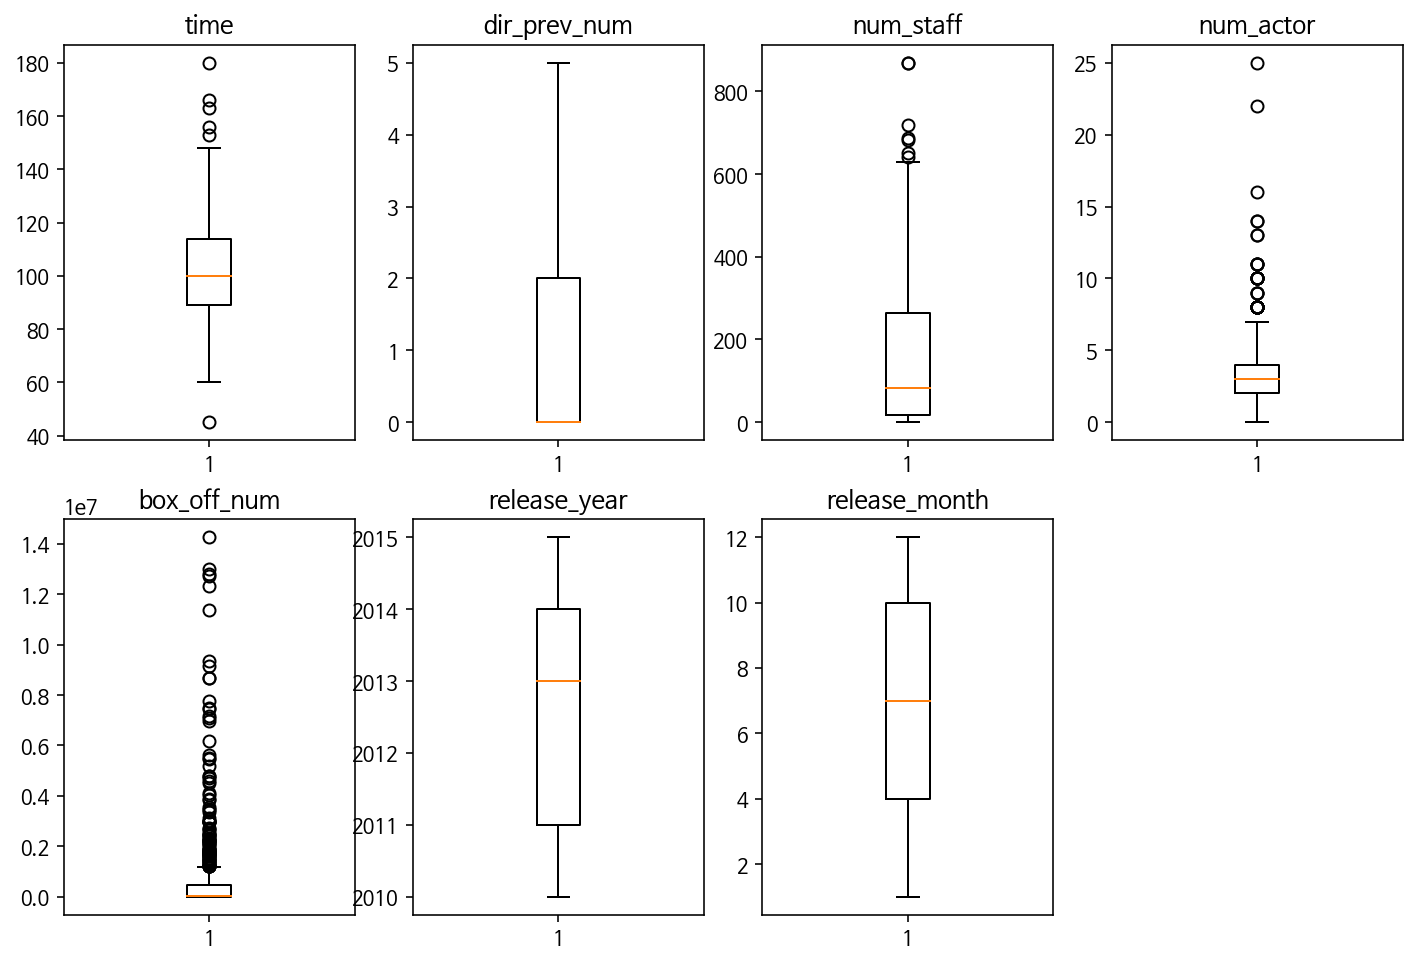

In [ ]:
# boxplot으로 수치 데이터 분포 확인
plt.figure(figsize=(12,8))

cols = train.columns[7:].insert(0,'time')
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title(cols[i])
  plt.boxplot(train[cols[i]])
plt.show()

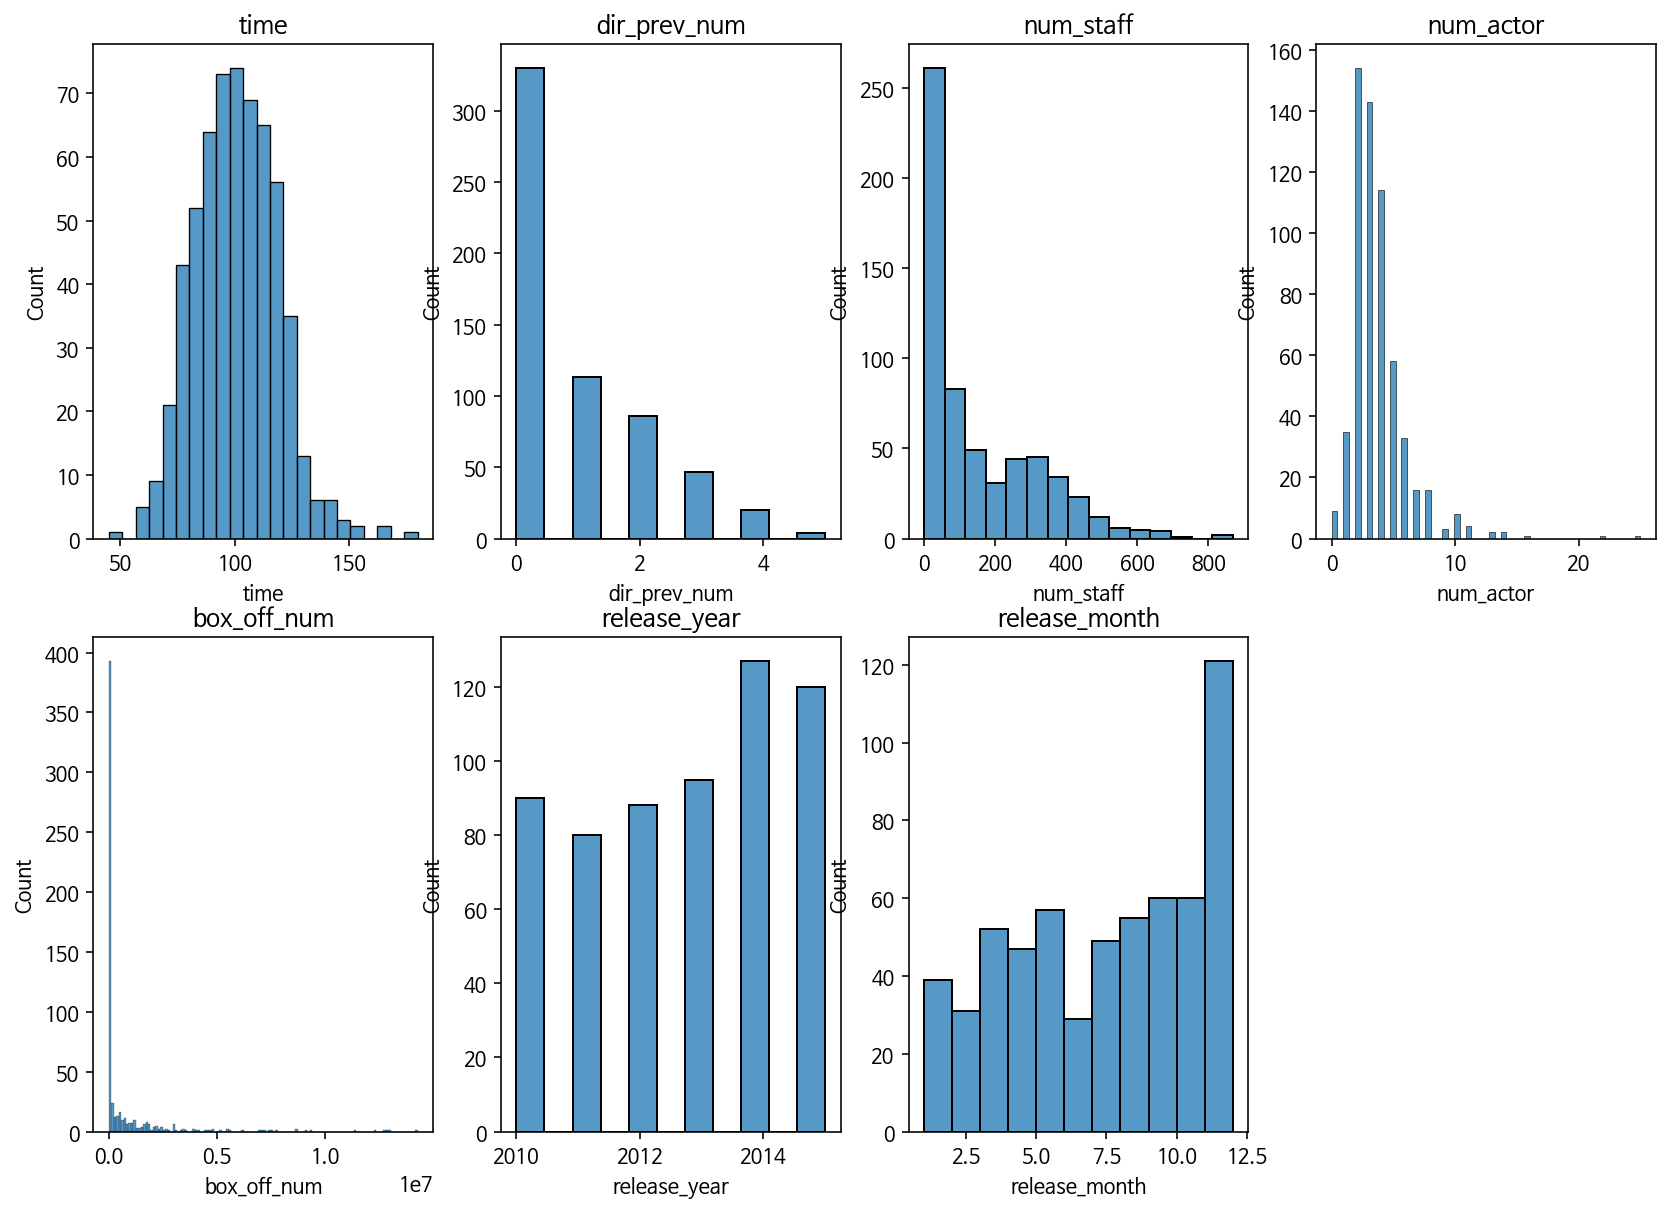

In [ ]:
# histplot으로 수치형 데이터 분포 확인
plt.figure(figsize=(14,10))

cols = train.columns[7:].insert(0,'time')
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title(cols[i])
  sns.histplot(train[cols[i]])
plt.show()

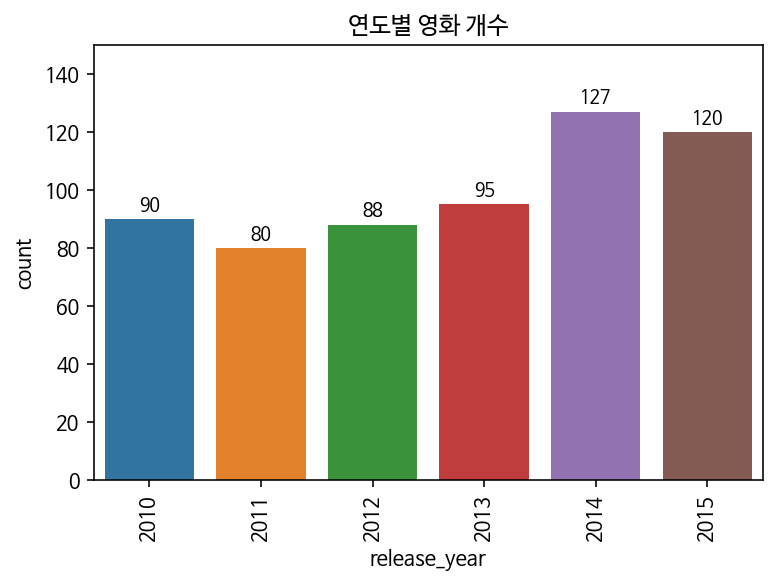

In [ ]:
ax= sns.countplot(x='release_year',data=train)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,150)
plt.xticks(rotation=90)

plt.title('연도별 영화 개수')
plt.show()

연도별 영화 개수는 점차 늘어나는 추세

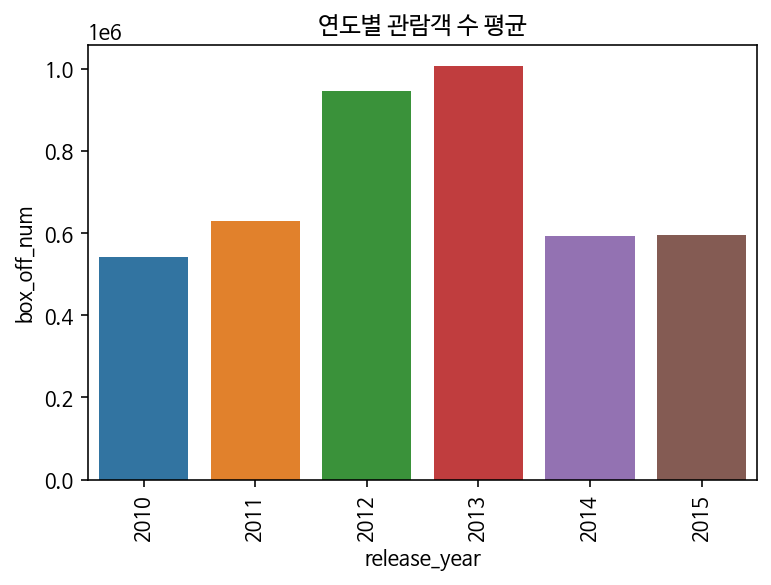

In [ ]:
plt.figure()
sns.barplot(x='release_year',y='box_off_num', data=train.groupby('release_year')['box_off_num'].mean().reset_index())
plt.title('연도별 관람객 수 평균')
plt.show()

연도별 관람객은 2012, 2013년까지 정점을 찍고 2014년 부터 약간 감소

In [ ]:
train['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

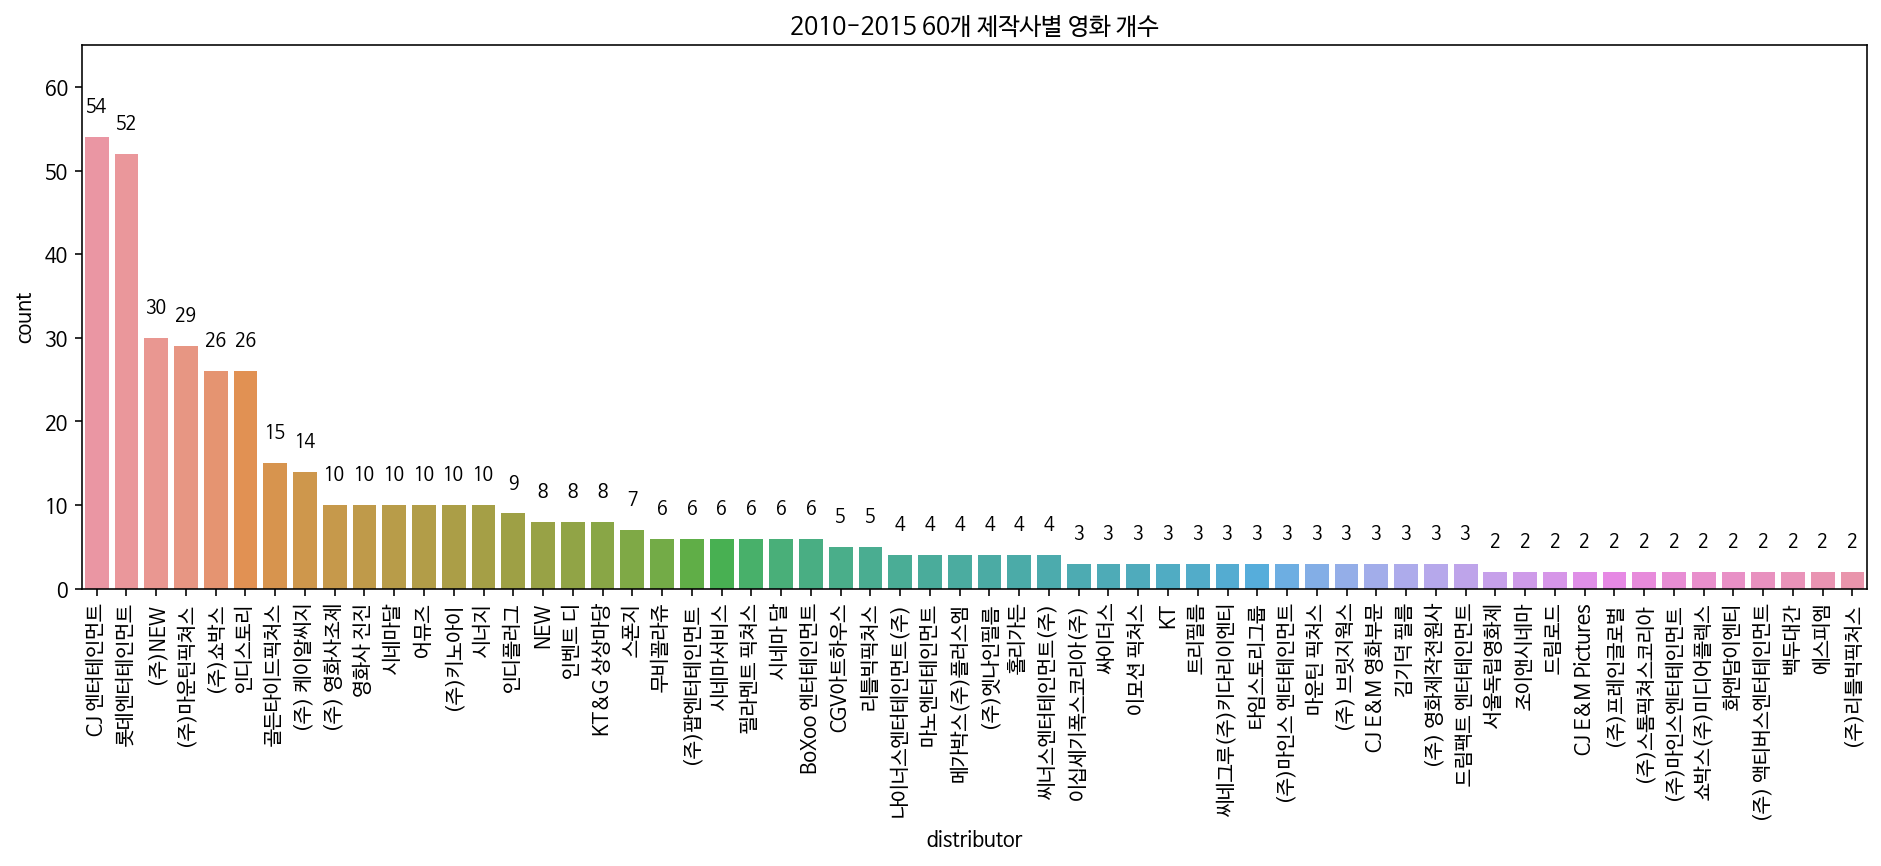

In [ ]:
plt.figure(figsize=(16,5))
ax= sns.countplot(x='distributor',data=train, order=train['distributor'].value_counts().head(60).index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,65)
plt.xticks(rotation=90)

plt.title('2010-2015 60개 제작사별 영화 개수')
plt.show()

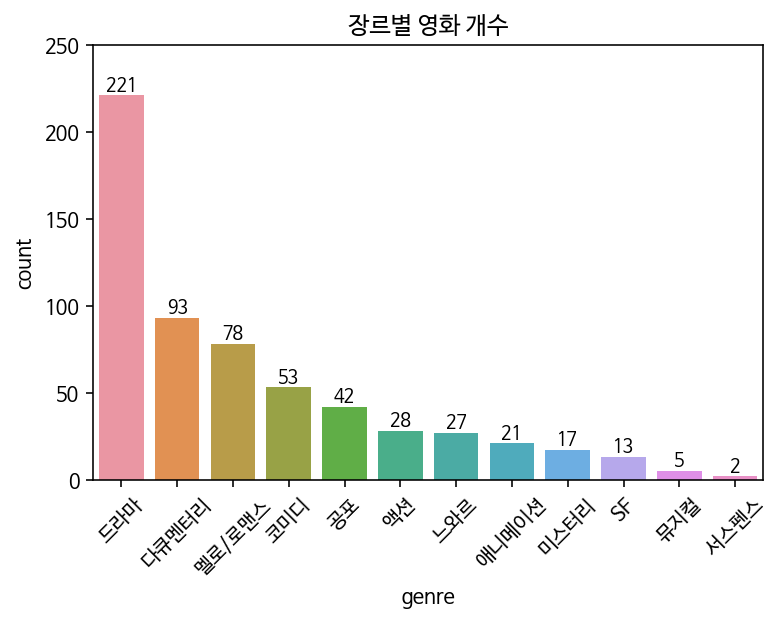

In [ ]:
ax= sns.countplot(x='genre',data=train, order=train['genre'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,250)
plt.xticks(rotation=45)

plt.title('장르별 영화 개수')
plt.show()

드라마 장르가 가장 많다

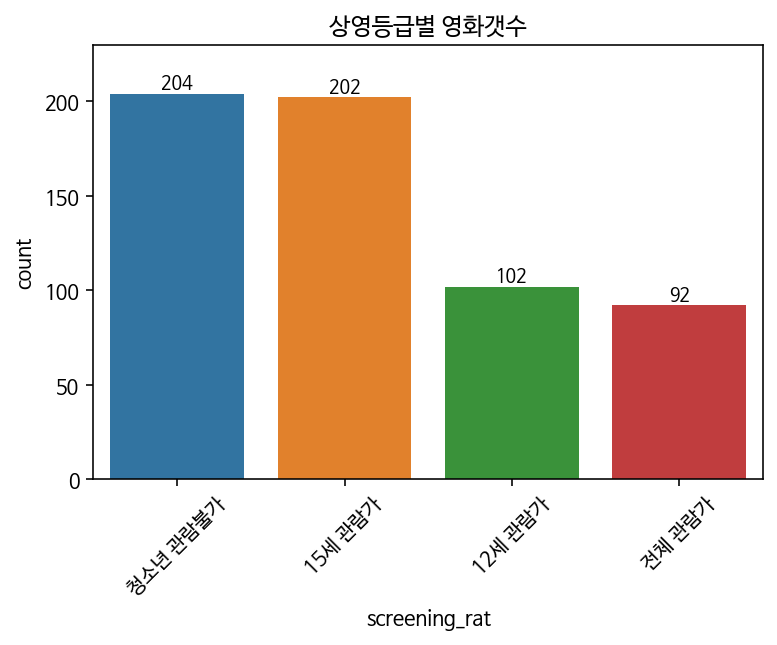

In [ ]:
ax= sns.countplot(x='screening_rat',data=train, order=train['screening_rat'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,230)
plt.xticks(rotation=45)

plt.title('상영등급별 영화갯수')
plt.show()

청소년 관람불가, 15세 관람가가 가장 많다

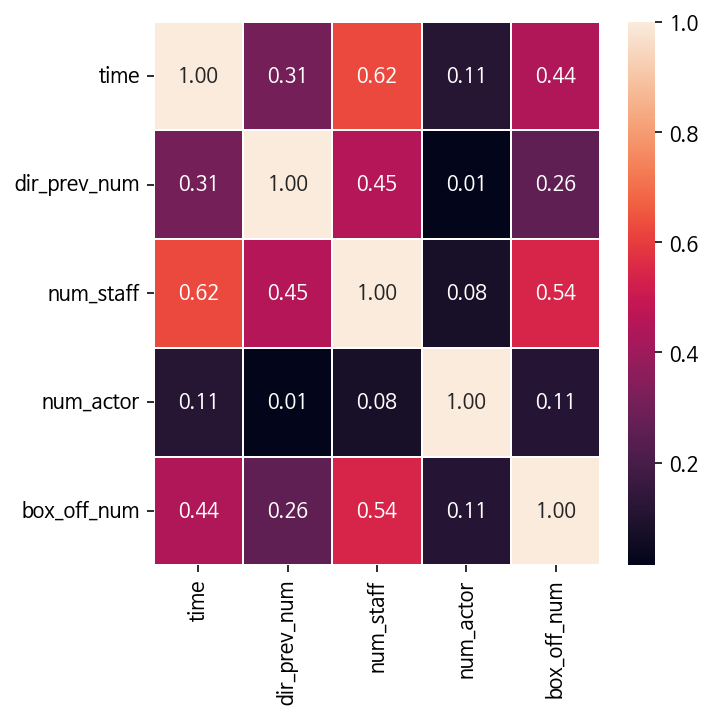

In [ ]:
# 상관계수
plt.figure(figsize=(5,5))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5)

* 관객수(box_off_num)에 주연배수 수(num_actor)는 많은 영향을 주지 않는다. num_actor는 다른 변수와도 상관관계가 낮음.


* 수치형 변수 간 상관관계만 확인한 거라 카테고리형 변수인 상영등급, 장르 포함 상관관계는 알 수 없음 



# 2.데이터 전처리

# 3.모델 생성 및 학습

# 4.결론